
<h1>For the "Median value of owner-occupied homes" provide a boxplot</h1>>
<span style="font-size:20px;">This text is larger</span>


Task 2: Generate Descriptive Statistics and Visualizations

"Median value of owner-occupied homes" provide a boxplot

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
pip install requests pandas


In [8]:
import requests
import pandas as pd
from io import BytesIO

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
response = requests.get(URL)
boston_data = pd.read_csv(BytesIO(response.content))

# Display the first few rows of the dataframe
boston_data.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
boston_df=boston_data

ConversionError: Failed to convert value(s) to axis units: ''

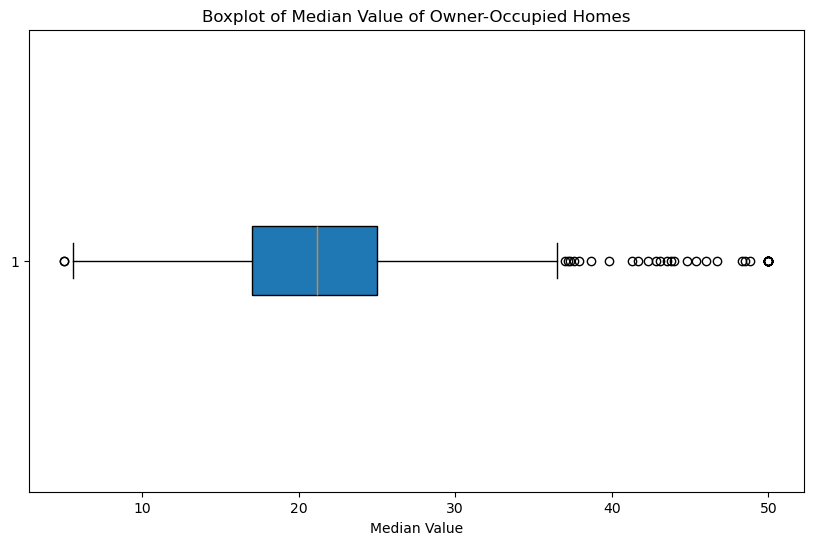

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
df=boston_df

# Create a boxplot for the "MEDV" column
plt.figure(figsize=(10, 6))
plt.boxplot(df['MEDV'], vert=False, patch_artist=True)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value')
plt.yticks('', ['Homes'])  # Corrected line

# Show the plot
plt.show()
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

Provide a  bar plot for the Charles river variable

ConversionError: Failed to convert value(s) to axis units: ''

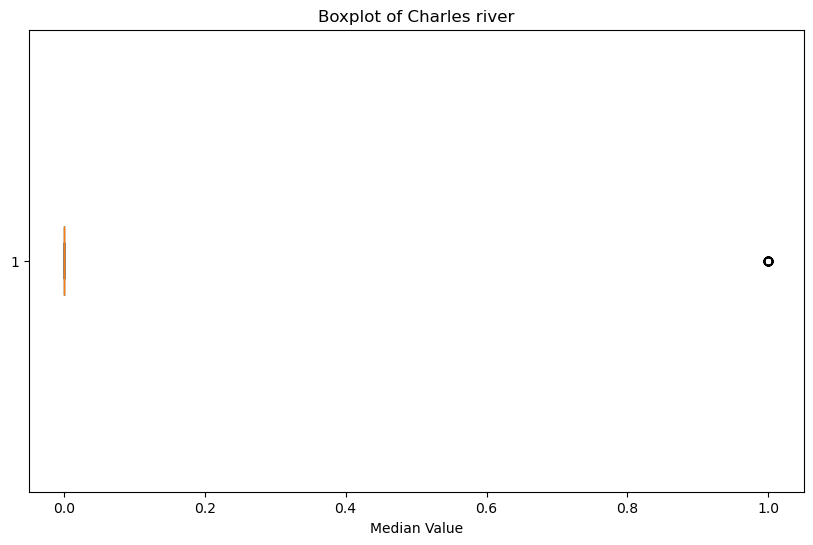

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
df=boston_df

# Create a boxplot for 
plt.figure(figsize=(10, 6))
plt.boxplot(df['CHAS'], vert=False, patch_artist=True)
plt.title('Boxplot of Charles river')
plt.xlabel('Median Value')
plt.yticks('', ['Charles'])  # Corrected line

# Show the plot
plt.show()
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

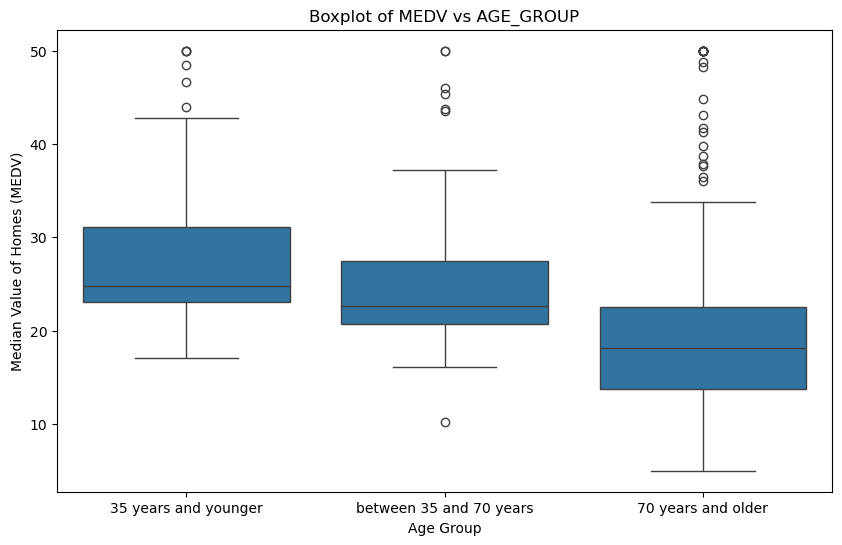

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
df=boston_df

# Discretize the AGE variable into three groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Create a boxplot for MEDV variable vs AGE_GROUP variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title('Boxplot of MEDV vs AGE_GROUP')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()


Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

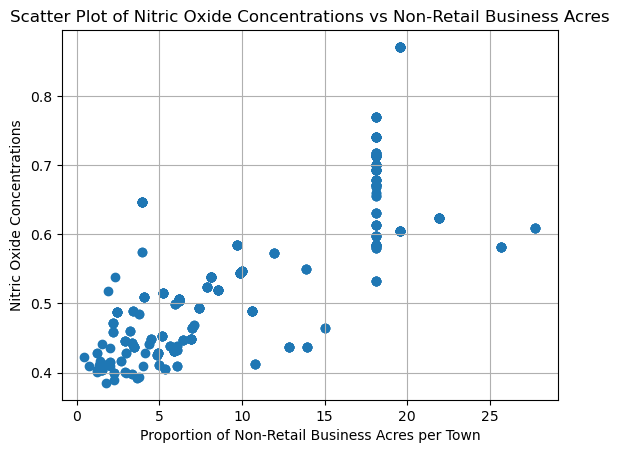

KeyError: 'non_retail_business_acres'

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df=boston_df

# Extract the relevant columns
nitric_oxide_concentrations = df['NOX']
non_retail_business_acres = df['INDUS']

# Create scatter plot
plt.scatter(non_retail_business_acres, nitric_oxide_concentrations)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations')
plt.grid(True)
plt.show()

# Analyze the relationship
correlation = df['non_retail_business_acres'].corr(df['nitric_oxide_concentrations'])
print(f"The correlation coefficient between nitric oxide concentrations and non-retail business acres is {correlation:.2f}.")


Create a histogram for the pupil to teacher ratio variable

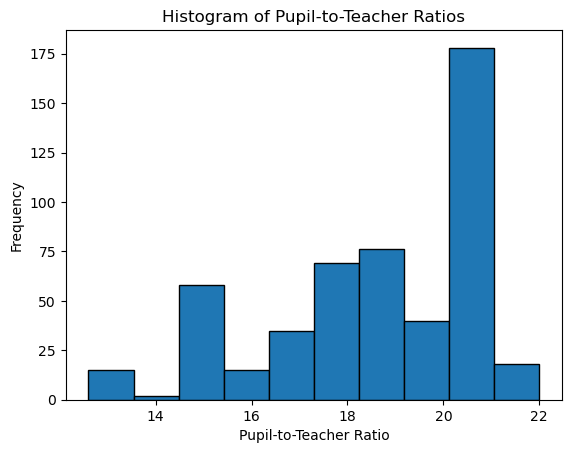

In [19]:
import matplotlib.pyplot as plt

df=boston_df

# Assuming the column name for pupil-to-teacher ratio is 'pupil_teacher_ratio'
pupil_teacher_ratios = df['PTRATIO']

# Create histogram
plt.hist(pupil_teacher_ratios, bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Pupil-to-Teacher Ratios')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')

# Show plot
plt.show()


Task 3: Use the appropriate tests to answer the questions provided.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
df=boston_df

# Assuming the column for Charles River is 'chas' (1 if bounded by river, 0 otherwise)
# and the column for house values is 'medv'
bounded_by_river = df[df['CHAS'] == 1]['MEDV']
not_bounded_by_river = df[df['CHAS'] == 0]['MEDV']


In [23]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(bounded_by_river, not_bounded_by_river, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 3.113291312794837
P-value: 0.0035671700981375174


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [25]:
import pandas as pd

# Read the CSV file into a DataFrame
df=boston_df

print(df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV                AGE_GROUP  
0  296.0     15.3   4.98  24.0  between 35 and 70 years  
1  242.0     17.8   9.14  21.6       70 years and older  
2  242.0     17.8   4.03  34.7  between 35 and 70 years  
3  222.0     18.7   2.94  33.4  between 35 and 70 years  
4  222.0     18.7   5.33  36.2  between 35 and 70 years  


In [27]:
df['AGE_BIN'] = pd.cut(df['AGE'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MEDV ~ C(AGE_BIN)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq     df          F        PR(>F)
C(AGE_BIN)   5889.141777    4.0  20.029107  2.582814e-15
Residual    36827.153638  501.0        NaN           NaN


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [31]:
from scipy.stats import pearsonr

# Assuming your columns are named 'NOx' for Nitric oxide concentrations and 'INDUS' for non-retail business acres
correlation, p_value = pearsonr(df['NOX'], df['INDUS'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: 0.7636514469209149
P-value: 7.913361061242812e-98


In [33]:
X = df[['DIS']]
y = df['MEDV']

import statsmodels.api as sm

X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        20:27:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0